Linear Regression

In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
x = 3
y = 2.5

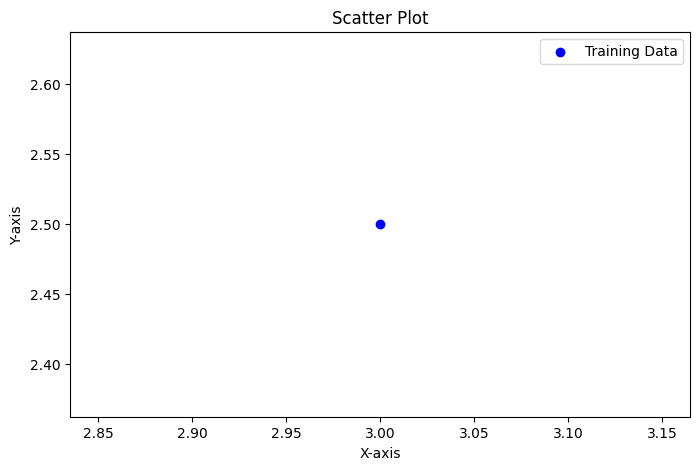

In [76]:
def plot_scatter(data, label, prediction = None):
    plt.figure(figsize=(8,5))
    plt.scatter(data, label, label = "Training Data", c = 'b')

    if prediction is not None:
        plt.scatter(data, prediction, label = "Prediction", c = 'r', s = 10, marker = 'x')

    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Scatter Plot")
    plt.legend()
    plt.show()
plot_scatter(x, y)

In [77]:
np.random.seed(47)
W1 = np.random.rand()
b1 = np.random.rand()
W2 = np.random.rand()
b2 = np.random.rand()

print(W1, b1, W2, b2)

0.11348847189364952 0.9744830944364566 0.7287346335011062 0.35146780589270143


1.3149485101174052 1.3097163264859344


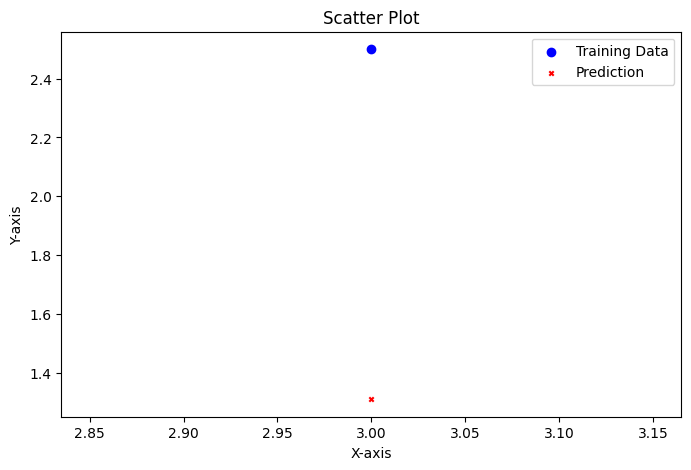

In [78]:
def forward_propagation(W1, b1, W2, b2, data):
    h1 = W1 * data + b1
    y_pred = W2 * h1 + b2 
    return h1, y_pred
h1, y_pred = forward_propagation(W1, b1, W2, b2, x)
print (h1, y_pred)
plot_scatter(x, y, y_pred)

Loss Value

In [79]:
L = (y_pred - y) ** 2
L

1.4167752234341386

Back Propagation

In [80]:
dL_dy = 2 * (y_pred - y)
dy_dW2 = h1
dy_dh1 = W2
dy_db2 = 1
dh1_dW1 = x
dh1_db1 = 1
dL_dW2 = dL_dy * dy_dW2
dL_db2 = dL_dy * dy_db2
dL_dW1 = dL_dy * dy_dh1 * dh1_dW1
dL_db1 = dL_dy * dy_dh1 * dh1_db1
print(dL_dW2, dL_db2, dL_dW1, dL_db1)

-3.130323486208785 -2.380567347028131 -5.2044056194837385 -1.734801873161246


Optimization

0.1655325280884869 0.9918311131680692 0.7600378683631941 0.3752734793629827
1.48842869743353 1.5065356537709684


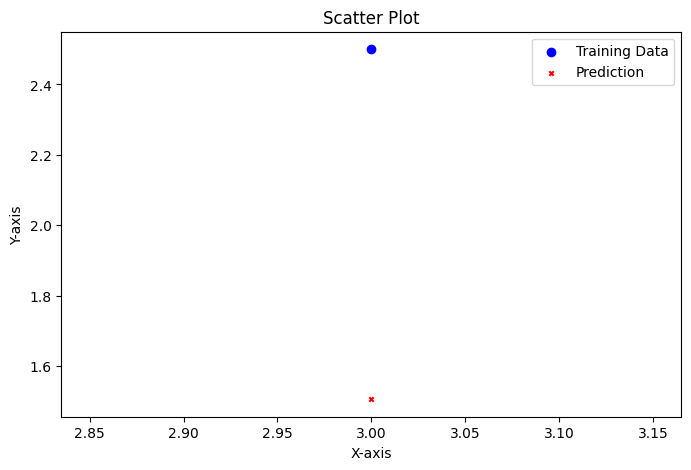

In [81]:
lr = 0.01
W1 = W1 - lr * dL_dW1
b1 = b1 - lr * dL_db1
W2 = W2 - lr * dL_dW2
b2 = b2 - lr * dL_db2
print(W1, b1, W2, b2)
h1, y_pred = forward_propagation(W1, b1, W2, b2, x)
print (h1, y_pred)
plot_scatter(x, y, y_pred)

epoch = 0, loss = 1.4167752234341386
epoch = 10, loss = 0.007102201642543319
epoch = 20, loss = 8.90498042322583e-06
epoch = 30, loss = 1.0286285576448325e-08
epoch = 40, loss = 1.1847813764155375e-11
epoch = 50, loss = 1.364506265848189e-14
epoch = 60, loss = 1.5714892831549482e-17
epoch = 70, loss = 1.8098843187641225e-20
epoch = 80, loss = 2.0845444513845106e-23
epoch = 90, loss = 2.3883552766471353e-26


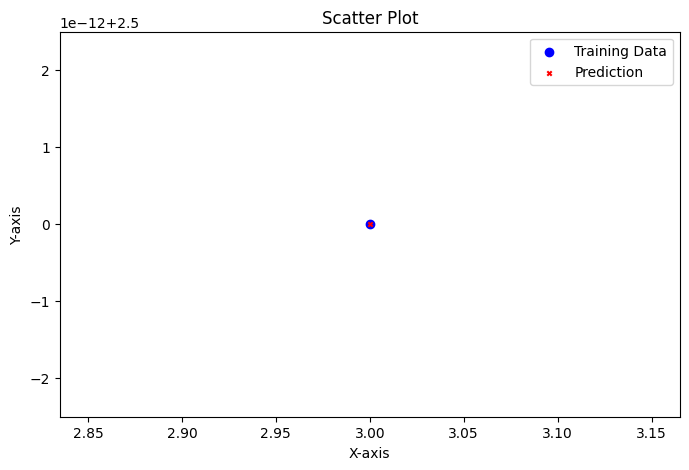

In [82]:
x = 3
y = 2.5

np.random.seed(47)
w1 = np.random.rand()
b1 = np.random.rand()
w2 = np.random.rand()
b2 = np.random.rand()

epochs = 100
for epoch in range(epochs):
    # forward
    h1, y_pred = forward_propagation(w1, b1, w2, b2, x)
    # loss
    L = (y_pred - y) ** 2
    if epoch % 10 ==0: 
        print(f"epoch = {epoch}, loss = {L}")
    # back
    dL_dy = 2 * (y_pred - y)
    dy_dw2 = h1
    dy_dh1 = w2
    dy_db2 = 1
    dh1_dw1 = x
    dh1_db1 = 1

    dL_dw2 = dL_dy * dy_dw2
    dL_db2 = dL_dy * dy_db2
    dL_dw1 = dL_dy * dy_dh1 * dh1_dw1
    dL_db1 = dL_dy * dy_dh1 * dh1_db1
    
    lr = 0.01
    w1 = w1 - lr *dL_dw1
    b1 = b1 - lr *dL_db1
    w2 = w2 - lr *dL_dw2
    b2 = b2 - lr *dL_db2
              
h1, y_pred = forward_propagation(w1, b1, w2, b2, x)
plot_scatter(x,y,y_pred)

epoch = 0, loss = 2.685962438583374
epoch = 10, loss = 0.739815354347229
epoch = 20, loss = 0.1690780222415924
epoch = 30, loss = 0.020957911387085915
epoch = 40, loss = 0.001779921934939921
epoch = 50, loss = 0.00013161194510757923
epoch = 60, loss = 9.343810233986005e-06
epoch = 70, loss = 6.56723443626106e-07
epoch = 80, loss = 4.604316927725449e-08
epoch = 90, loss = 3.219838617951609e-09


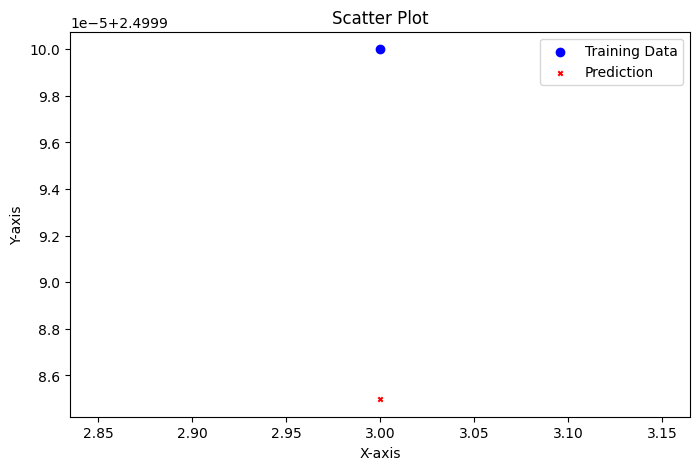

In [83]:
import torch
import torch.nn as nn
import torch.optim as optim
x = torch.tensor([3.0])
y = torch.tensor([2.5])
w1 = torch.randn(1, requires_grad=True)
b1 = torch.randn(1, requires_grad=True)
w2 = torch.randn(1, requires_grad=True)
b2 = torch.randn(1, requires_grad=True)
epochs = 100
for epoch in range(epochs):
    h1 = w1 * x + b1
    y_pred = w2 * h1 + b2
    L = (y_pred - y) ** 2
    if epoch % 10 ==0: 
        print(f"epoch = {epoch}, loss = {L.item()}")
    L.backward()
    lr = 0.01
    with torch.no_grad():
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w2 -= lr * w2.grad
        b2 -= lr * b2.grad
        w1.grad.zero_()
        b1.grad.zero_()
        w2.grad.zero_()
        b2.grad.zero_()
h1 = w1 * x + b1
y_pred = w2 * h1 + b2
plot_scatter(x.numpy(), y.numpy(), y_pred.detach().numpy())